## Data Collect

In [ ]:
# 참고내용
# CNN
# 'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (부록)\\(Misc.) 1. cvlib을 활용한 편리한 얼굴 & 물체 검출'
# 'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (메인)\\(Appendix) 4. TF2.0 Tensorboard & Keras for CNN MNIST (+ Colab GPU with GoogleDrive)'
# 'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (메인)\\(Appendix) 2. Build, Train, and Visualize CNN models (CNN Basic)'

# DNN
# 'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (메인)\\(Appendix) 3. CNN for Fashion MNIST & CIFAR10 (+Transfer learning)'

### Image Scrapping

In [1]:
import pandas as pd


from selenium import webdriver
from bs4 import BeautifulSoup
import requests

import time

#### Image URL address scrapping

In [55]:
# url = "https://store.musinsa.com/app/goods/497858"

In [ ]:
item_num = "685185"
base_url = "https://store.musinsa.com/app/goods/"
url = base_url + item_num

In [2]:
# headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36'}

In [56]:
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe')
driver.get(url)

In [57]:
img_url_lst = []
img_url_temp_lst = []
img_url_right_lst = [] # 제대로 후기를 올린 사진들
img_url_wrong_lst = [] # 후기를 잘못 올려서 고객센터에서 댓글을 올려진 사진들

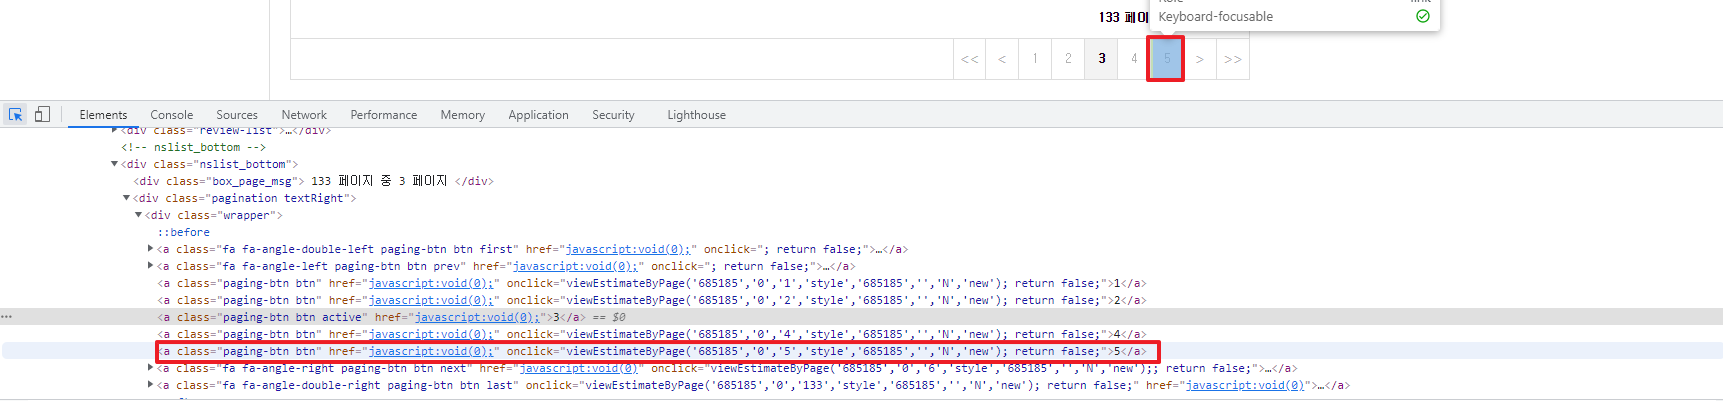

In [66]:
# 한 page당 10개의 review
# 1~100page 이동
# total 1000개의 Data확보
# scrapping_url_dir = soup.find_all('li', {"class":"review-content-photo__item"})
for i in range(1,360):
    # Page이동 - java script code실행
    driver.execute_script("viewEstimateByPage('497858','0',{},'style','1865908','','N','new'); return false;".format(i))
    time.sleep(2) # selenium 특성상, loading속도를 못따라갈 수 있으므로 2초씩 sleep진행
    web = driver.page_source # selenium으로 열어둔 driver의 현재 page로 접근
    soup = BeautifulSoup(web, 'html.parser')
    # html문서로 전체 페이지 불러오기
    scrapping_url_path = soup.find_all('div', {"class":"review-list"})
    for img_path in scrapping_url_path:
        try:
            # 무신사가 댓글을 달았을때, 무신가 관리자 썸네일이 있으면 에러가 나지 않음.(Wrong)
            img_path.find_all('img', {"alt":"무신사 관리자 썸네일"})[0]
            # style 후기 일때만
            try:
                if img_path.find_all('a', {"class":"review-profile__link"})[0]['href'].find('photo') < 0:
                    temp_ = img_path.find_all('li', {"class":"review-content-photo__item"})[0]('img')[0]['src']
                    # 잘못 후기올린 (전신사진x) 사진들을 Wrong 리스트에 url 넣기
                    img_url_wrong_lst.append("https:"+temp_)

            except:
                pass
        except:
            # 무신사가 댓글을 달지 않았을때, 에러가 남 (Right)
            # style 후기 일때만
            try:
                if img_path.find_all('a', {"class":"review-profile__link"})[0]['href'].find('photo') < 0:
                    temp_ = img_path.find_all('li', {"class":"review-content-photo__item"})[0]('img')[0]['src']
                    img_url_right_lst.append("https:"+temp_)

            except:
                pass
            
# # page 이동 시에 url이 바뀌지 않아서 선택한 방법
# # # page이동 방법1 - java code 실행시키기
# # driver.execute_script("viewEstimateByPage('685185','0','2','style','685185','','N','new'); return false;")
        
# # # page이동 방법2 - css 코드에서 찾기
# # driver.find_elements_by_css_selector('#wrapStyleEstimateList > div > div.nslist_bottom > div.pagination.textRight > div > a')[4].click()

# # direct 접근방법
# # soup.find("div",{"class":"wrap review_list_detail style_review"}).find_all('li', {"class":"review-content-photo__item"})

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [72]:
driver.close()
driver.quit()

ConnectionAbortedError: [WinError 10053] 현재 연결은 사용자의 호스트 시스템의 소프트웨어의 의해 중단되었습니다

#### image save

In [8]:
import urllib.request
import glob

import pandas as pd
import os

In [9]:
# 중복제거
img_url_right_lst = list(set(img_url_right_lst))
img_url_wrong_lst = list(set(img_url_wrong_lst)))

In [11]:
# save as df
img_url_right_lst=pd.DataFrame(img_url_right_lst,columns=['url'])
img_url_wrong_lst=pd.DataFrame(img_url_wrong_lst,columns=['url'])
img_url_right_lst.to_csv('img_url_right_lst.csv',encoding='utf-8')
img_url_wrong_lst.to_csv('img_url_wrong_lst.csv',encoding='utf-8')

In [12]:
# load url list
img_url_right_lst = pd.read_csv('img_url_right_lst.csv',encoding='utf-8')
img_url_wrong_lst = pd.read_csv('img_url_wrong_lst.csv',encoding='utf-8')
df_img_right_url = img_url_right_lst.iloc[:,1:]
df_img_wrong_url = img_url_wrong_lst.iloc[:,1:]

img_url_right_lst = df_img_right_url['url'].tolist()
img_url_wrong_lst = df_img_wrong_url['url'].tolist()

In [42]:
# images folder 생성
os.mkdir(os.getcwd()+"\\images_wrong")
os.mkdir(os.getcwd()+"\\images_right")

In [43]:
# img url list 에서 각각의 url로부터 image file 'images0000.jpg'를 저장
for index, url in enumerate(img_url_lst):

    urllib.request.urlretrieve(url, "images/images{0:04}.jpg".format(index))
    
    if index%100 == 0:
        print('Downloaded image # :', index)
    time.sleep(0.4)
    

print('Download completed!')

Downloaded image # : 0
Downloaded image # : 100
Downloaded image # : 200
Downloaded image # : 300
Downloaded image # : 400
Downloaded image # : 500
Downloaded image # : 600
Downloaded image # : 700
Downloaded image # : 800
Downloaded image # : 900
Downloaded image # : 1000
Downloaded image # : 1100
Download completed!


### Prepare Dataset

In [13]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [14]:
import cv2
import cvlib as cv

In [183]:
# 필요없어진듯?
# # resize 함수

# def resize_imgs(path):
#     img = cv2.imread(path)
#     if max(img.shape)>256:
        
#         #세로가 256 px 이상이고 세로로 긴 경우
#         if img.shape[0] == max(img.shape):
#             new_w = img.shape[1] * (256.0/img.shape[1])
#             new_h = img.shape[0] * (256.0/img.shape[1])
#         #가로가 256 px 이상이고 세로로 긴 경우
#         elif img.shape[1] == max(img.shape):
#             new_w = img.shape[1] * (256.0/img.shape[0])
#             new_h = img.shape[0] * (256.0/img.shape[0])
#     else:
#             new_w=img.shape[1]
#             new_h=img.shape[0]
            
#     img = cv2.resize(img, (int(new_w), int(new_h)))
#     return img

#### detect_fullbody (포기상태)
https://www.researchgate.net/figure/Some-exemplar-human-body-detection-results_fig1_325104310

In [8]:
# def cv_detect_fullbody(path): # path parameter를 통해 파일 경로를 받아들이게 됩니다.
#     img = cv2.imread(path,1)
# #     img = cv2.resize(img,(14,28))

#     if (type(img) is np.ndarray):
#         print(img.shape) # 세로, 가로, 채널

#         fullbody_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # detectMultiScale(Original img, ScaleFactor, minNeighbor) : further info. @ http://j.mp/2SxjtKR
#         fullbody = fullbody_cascade.detectMultiScale(gray, 1.05 , 3) 
#         for (x, y, w, h) in fullbody:
#             cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
#             roi_gray = gray[y:y+h, x:x+w]
#             roi_color = img[y:y+h, x:x+w]

#         cv2.imwrite(path, img)
#     else:
#         print('Error occurred within cv_detect_face!')
#         print(path)
        
        
#     return img

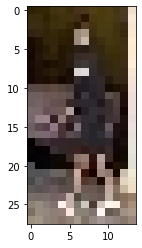

In [221]:
# plt.imshow(cv2.cvtColor(cccc, cv2.COLOR_BGR2RGB))
# plt.show()

https://answers.opencv.org/question/42049/body-detection-using-haarcascade/ <br>
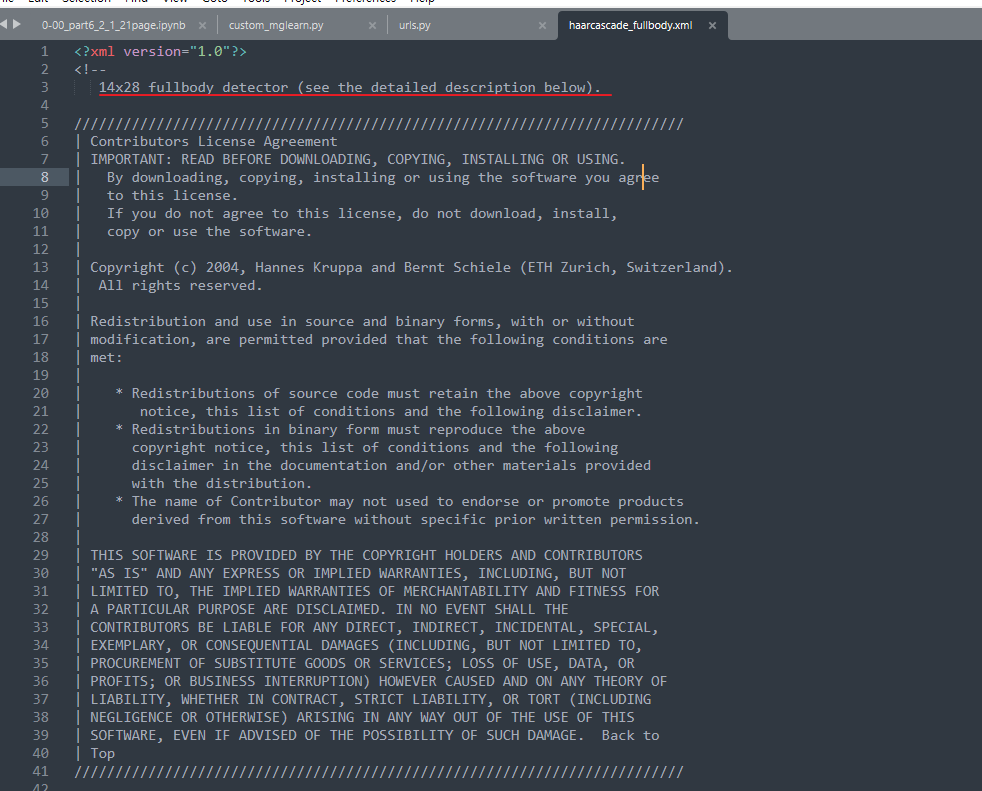<br>
detecting을 못함. -> 포기 ㅋ

## Deep Learning

In [18]:
# 필요없을듯
# from sklearn.model_selection import train_test_split

In [15]:
# Data dir 확인
train_ok_dir = os.path.join('images/True')
train_no_dir = os.path.join('images/False')
print(len(os.listdir(train_ok_dir))) # 1016
print(len(os.listdir(train_no_dir))) # 97
# Data Augmentation and False Data 추가 확보 필요

1016
97


In [46]:
train_ok_names = os.listdir(train_ok_dir)
train_no_names = os.listdir(train_no_dir)

In [48]:
import matplotlib.image as mpimg

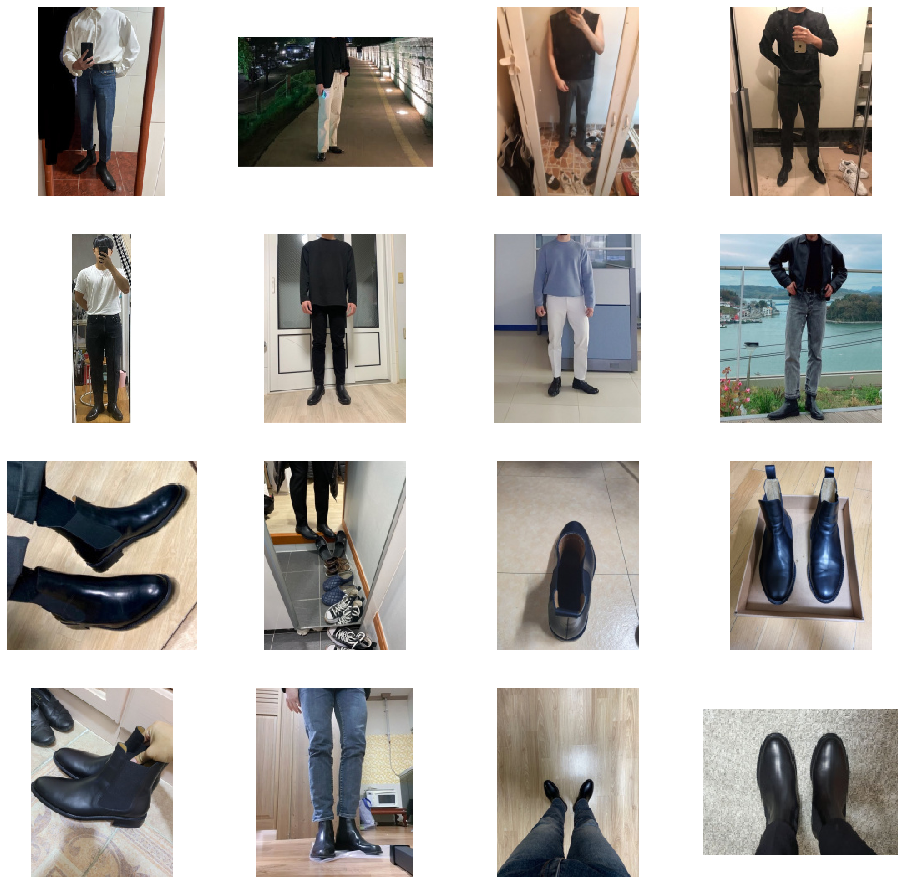

In [49]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_ok_pix = [os.path.join(train_ok_dir, fname) 
                for fname in train_ok_names[pic_index-8:pic_index]]
next_no_pix = [os.path.join(train_no_dir, fname) 
                for fname in train_no_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_ok_pix+next_no_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [3]:
# Data 불러오기
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# 255개의 pixel을 나눠서 정규화?한다고 생각하면됨.
train_datagen = ImageDataGenerator(rescale = 1./255)
 
# 'train_datagen' 이라는 generator를 이용해서 모든 데이터를 긁어옴 
train_generator = train_datagen.flow_from_directory(
        'images', # images folder에 있는 all images 불러오기
        target_size=(300, 300),  # all images 사이즈 300X300변경
        batch_size=128,
        class_mode='binary')     # 적립금 지급 or 댓글 대상으로 이진분류를 할것이기 때문에 binary선택.

Found 2992 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50

conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(300, 300, 3))
conv_base.summary()

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\RYU\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 150, 150, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [5]:
model = tf.keras.models.Sequential([
    # 300 by 300은 하단에서 맞춰줄거임.
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
        
    
#     conv_base,
#     tf.keras.layers.Flatten(),
    
    
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

NameError: name 'tf' is not defined

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [35]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [73]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1)

Epoch 1/5
9/9 [==============================] - 42s 5s/step - loss: 0.3261 - acc: 0.9128
Epoch 2/5
9/9 [==============================] - 39s 4s/step - loss: 0.2581 - acc: 0.9128
Epoch 3/5
9/9 [==============================] - 40s 4s/step - loss: 0.2714 - acc: 0.9128
Epoch 4/5
9/9 [==============================] - 40s 4s/step - loss: 0.2205 - acc: 0.9137
Epoch 5/5
9/9 [==============================] - 40s 4s/step - loss: 0.2291 - acc: 0.9182


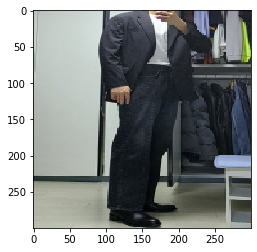

In [77]:
plt.imshow(train_generator[0][0][0])

In [ ]:
tf.image.flip_left_right()

### Resize

### Detecting

In [ ]:
# #RESNet을 통한 Transfer Learning
# from tensorflow.keras.applications.resnet50 import ResNet50

# conv_base = ResNet50(weights='imagenet',
#                      include_top=False,
#                      input_shape=(300, 300, 3))
# conv_base.summary()

### Learning